# Analysis Noun Class in R

This code is main edited by Enze Wang

Fixed by Yicen Liu and Hua Tong


# Attention

Please put four .csv file in data folder and put this code in main folder instead of code folder.

This code want to do test for business on whether add some serview or food to incease star rating. 

In [1]:
if (!require(ggplot2)){
  install.packages("ggplot2")
}
if (!require(DAAG)){
  install.packages("DAAG")
}
if (!require(glmnet)){
  install.packages("glmnet")
}
if (!require(grid)){
  install.packages("grid")
}
if (!require(gridExtra)){
  install.packages("gridExtra")
}
if (!require(MASS)){
  install.packages("MASS")
}
if (!require(car)){
  install.packages("car")
}
if (!require(corrplot)){
  install.packages("corrplot")
}
if (!require(leaps)){
  install.packages("leaps")
}
if (!require(caret)){
  install.packages("caret")
}
if (!require(psych)){
  install.packages("psych")
}
if (!require(stats)){
  install.packages("stats")
}
if (!require(broom)){
  install.packages("broom")
}
if (!require(gbm)){
  install.packages("gbm")
}
if (!require(randomForest)){
  install.packages("randomForest")
}
if (!require(olsrr)){
  install.packages("olsrr")
}
if (!require(regclass)){
  install.packages("regclass")
}
if (!require(pROC)){
  install.packages("pROC")
}

Loading required package: ggplot2

Loading required package: DAAG

Loading required package: lattice

Loading required package: glmnet

Loading required package: Matrix

Loaded glmnet 4.0-2

Loading required package: grid

Loading required package: gridExtra

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:DAAG’:

    hills


Loading required package: car

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:DAAG’:

    vif


Loading required package: corrplot

corrplot 0.84 loaded

Loading required package: leaps

Loading required package: caret

Loading required package: psych


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Loading required package: broom

Loading required package: gbm

Loaded gbm 2.1.8

Loading required package: randomForest

randomFor

In [2]:
Word_Matrix_Data=read.csv("data/Word_Count_Matrix.csv")
Review=read.csv("data/pizza_review.csv")
Noun_Variables_Important=read.csv("data/Noun_Variables_Important.csv")

In [3]:
ID_test=Word_Matrix_Data$review_id==Review$review_id
for(i in ID_test){
    if(i==FALSE){
        print(i)
    }
}

In [4]:
Review

X,review_id,user_id,business_id,stars,useful,funny,cool,text,date
<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>
0,hfXVxrlD6fr1kXfz6sR13Q,7nIzgNF7YzI-UAyYr3y9hw,J9f-9Prw2YVM-fiZqv2fmQ,2,0,1,1,"Parking is tough to get here so I don't get to go much. I also get a little cautious sometimes as they frequently have multiple questionable looking characters. Pro's: - Legendary fries that used to be super huge and gave you great value for your buck - Good burgers - If you drink, it looks like they have a lot of different kinds of alcohol Con's: - Customer Service? Hahaha. Not here. If you can get more than a fart out of one of the twin's working there, you are ahead of the pack. - Dirty, messy tables, crap everywhere. - Many questionable characters here. Someone once asked me if I wanted to buy stolen jewelry off them while I was eating. I'm being totally honest too. - Their french fry portions have gotten smaller. They used to need two baskets for a large fry and now only need one. - Really expensive hot dogs. - They have strict limits on ketchup. No I'm not joking. 2 for large fries, 1 for anything less. I do recommend getting their legendary fries at least once and I do recommend the egg burger, but get it to go and go when it is light out.",2013-09-04 04:35:27
1,EDQpLLFiAxeSxWI5ipwzBQ,SkueY7hVsyXmYItELoodGw,lpel3pRFAzlow7u2TJMz4Q,4,3,0,0,"The server had an extensive knowledge of wines & their various menu selections and it was clear that we were her top priority. The pizza and dessert were amazing. My only complaint is that the chairs were uncomfortable, I think they could add some more comfortable seating to give this more of a ""wine bar"" feel. Otherwise everything was amazing!",2015-04-28 19:28:12
2,RWmT90rP7wYo57dG1cyvww,n3ahpmnEXsZYj3nbVMoUmg,Zja7ykq3icDzkN20XX6j1w,5,1,0,1,"Fast Forward Every trip from NYC to Pitt includes a visit to Aiello's. And if we know anyone driving East, we request a transfer! If you are in search of fancy ""gourmet"" pizza, go elsewhere. At Aiello's, you order the pizza you specify - and it is absolutely perfect!",2013-07-12 23:08:35
3,0jduztItUhOh3FzKGjMxZQ,lVbPEaNUxFjwUydjentrYw,hr0vxeTzlHx6fTpSSmu2AA,5,1,0,0,"By far my favorite Cleveland/Akron restaurant! Great food, very consistent. Bartenders are always great. If it is on the menu... Try it. Only the Navajo tacos have been so so. Everything else is outstanding.",2013-12-07 01:09:23
4,sxfmzhMvZ8LlI1x4fhNjKg,SQKRGzDa7qd8qHb13Z2-Hg,F4kjKxXXyn3e-BYVb1mWcg,4,0,0,0,All food is good here I usually get the Italian sub or pizza. Would recommend. Very busy on Friday and Saturday. If you can pick it up usually takes about an hour for delivery. And if you order sides of sauces make sure you get usually they forget to put in my bag.,2014-10-27 01:42:40
5,Mp7qXWexqoSqKbNh7dYhJg,jAYIkCIqhDgQcp7PG8z_vA,J9f-9Prw2YVM-fiZqv2fmQ,5,1,0,0,"Fries are cooked to perfection....very crispy. Portions are out of this world. Don't waste your time on a small or medium, you'll regret not having more. Hot Dogs & Burgers were very good. Secure Parking is available around the corner at S Bouquet St & Sennott St for a few bucks.",2015-05-26 07:45:02
6,5e_JUyKVFpYxl9qHp1MG1Q,w1LWJ4l7jDeMNmmgIUKZyg,7xHbnGo4MXFkBm6gYSu_xg,2,1,0,0,"The pizza was great, but the guys that make it , while we were there they were scratching their heads, taking their hats off to run fingers through their hair. And one guy that was cutting up something was eating. They need to wash their hands after scratching. Will not be back to this one",2018-05-02 18:55:11
7,D2oYk9ipsvsYP_ls0aL9kg,9IA3P3DxrZcoAl29IYOloA,eU_713ec6fTGNO4BegRaww,4,0,0,1,"It's on Mt. Washington, but no view. The inside looks like a fire hall set up for a wedding. It is so loud that I sometimes can't hear my dinner partner across the table. But none of that matters when you taste the food. The pasta is outstanding, and served in enormous, enormous portions. The menu is a bit cryptic - dishes aren't really described, only named,

In [5]:
Word_Matrix_Data

X,review_id,pizza,food,cheese,sauce,service,salad,restaurant,crust,⋯,cranberry,linguini,fennel,fryer,pea,coconut,mixture,peach,manicotti,romaine
<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,hfXVxrlD6fr1kXfz6sR13Q,0,0,0,0,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
1,EDQpLLFiAxeSxWI5ipwzBQ,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,RWmT90rP7wYo57dG1cyvww,2,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0jduztItUhOh3FzKGjMxZQ,0,1,0,0,0,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
4,sxfmzhMvZ8LlI1x4fhNjKg,1,1,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,Mp7qXWexqoSqKbNh7dYhJg,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,5e_JUyKVFpYxl9qHp1MG1Q,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
7,D2oYk9ipsvsYP_ls0aL9kg,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
8,CKHk7l_VriSEqPbG1PSLTw,1,0,0,0,0,2,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [6]:
Word_Matrix=data.frame(Word_Matrix_Data[,-c(1,2)])
Rating=Review$stars

In [7]:
Word_Data=cbind(Rating,Word_Matrix)

In [8]:
Word_Data

Rating,pizza,food,cheese,sauce,service,salad,restaurant,crust,chicken,⋯,cranberry,linguini,fennel,fryer,pea,coconut,mixture,peach,manicotti,romaine
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,2,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


Because we want to give business how to extend their menu or service. Some noun may not be suitable to put in our dataset. Therefore we only chosse some of noun. Some words like "salt" "street" "food", it is not a good idea to put them in our linear regression.

In [9]:
Necessary=names(Word_Data) %in% c("Rating",'cheese','salad','chicken','beer','pasta','pepperoni','wine','sausage','garlic','tomato','mushroom','steak','onion','bacon','mozzarella','potato','shrimp','fish','marinara','spaghetti','lettuce','bbq','lasagna','gelato','cocktail','ravioli','taco','pesto','margherita','chocolate','coffee','rib','calamari','crunchy','arugula','salmon','artichoke','margarita','seafood','crab','prosciutto','caesar','veal','noodle','tiramisu','panini','lobster','cider','zucchini','tea','donut','broccoli','ale','ham','turkey','risotto','pretzel','beverage','penne','cheesecake','lamb','toast','provolone','pickle','vodka','cannoli','pita','flatbread','cherry','cafe','marsala','snack','cauliflower','scallop','cookie','wing','hummus','cooky','carbonara','cheddar','cinnamon','vinaigrette','coke','rigatoni','juice','strawberry','patty','cheeseburger','salami','salsa','slaw','fettuccine','cracker','gorgonzola','jam','liquor','pistachio','sangria','falafel','bisque','polenta','pastry','coleslaw','chorizo','martini','broth','brownie','sushi','lemonade','whiskey','espresso','pudding','macaroni','barbecue','dumpling','bourbon','tortilla','raspberry','tortellini','cole','biscuit','cranberry','linguini','manicotti','romaine')
Linear_Food_Data=data.frame(Word_Data[Necessary])

In [10]:
Linear_Food_Data

Rating,cheese,salad,chicken,beer,pasta,pepperoni,wine,sausage,garlic,⋯,bourbon,tortilla,raspberry,tortellini,cole,biscuit,cranberry,linguini,manicotti,romaine
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,2,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
3,0,2,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


# Linear Regression

The first method we want to use is linear regression. We want to figure out the connection between the occurance of word with its star rating. 

In [11]:
Linear_Regression=lm(Rating~.,data=Linear_Food_Data)

In [12]:
summary(Linear_Regression)


Call:
lm(formula = Rating ~ ., data = Linear_Food_Data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4053 -0.8357  0.3611  1.3611  3.0231 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.638883   0.006891 528.044  < 2e-16 ***
cheese       -0.053074   0.009091  -5.838 5.31e-09 ***
salad         0.009067   0.009947   0.912 0.361994    
chicken      -0.020529   0.011196  -1.834 0.066718 .  
beer          0.053716   0.010700   5.020 5.17e-07 ***
pasta        -0.017776   0.014745  -1.206 0.227989    
pepperoni     0.046827   0.016384   2.858 0.004264 ** 
wine          0.094792   0.016197   5.852 4.87e-09 ***
sausage       0.086171   0.020233   4.259 2.06e-05 ***
garlic        0.027560   0.019942   1.382 0.166980    
tomato       -0.003855   0.022178  -0.174 0.862015    
mushroom     -0.047076   0.021585  -2.181 0.029191 *  
steak        -0.014804   0.022653  -0.654 0.513422    
onion        -0.037977   0.025884  -1.467 0.142325    
bacon    

Saving 7 x 7 in image



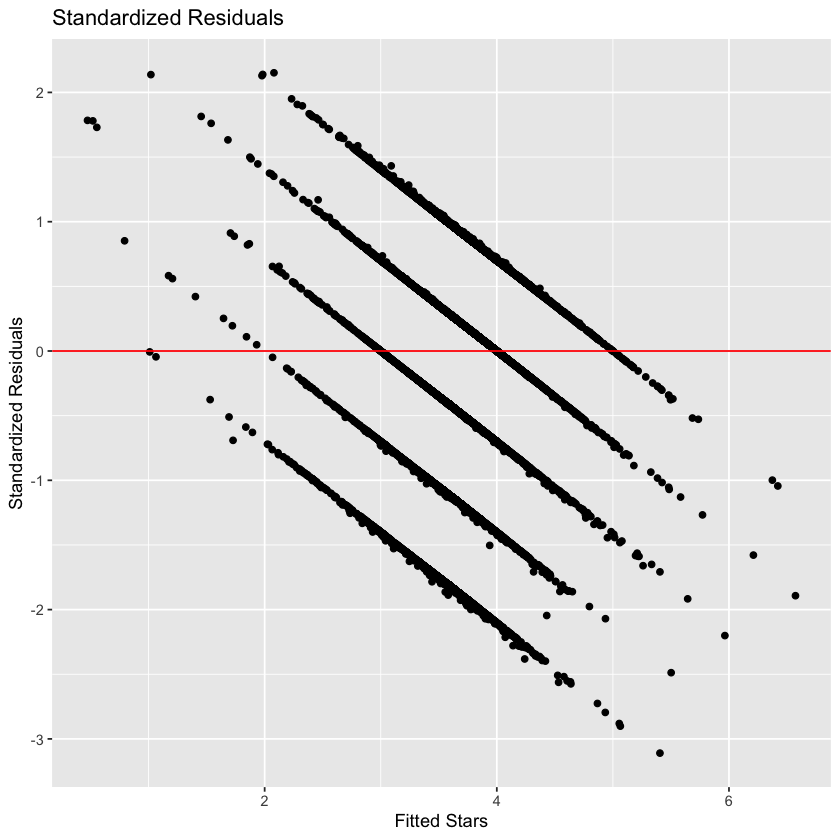

In [13]:

g=ggplot()+
geom_point(aes(x=predict(Linear_Regression),rstandard(Linear_Regression)))+
xlab("Fitted Stars")+
ylab("Standardized Residuals")+
ggtitle("Standardized Residuals")+
geom_hline(yintercept = 0,color="red")
ggsave("figure/Linear_Regression_Standardized_Residuals.jpeg",g)
g

pdf 
  2

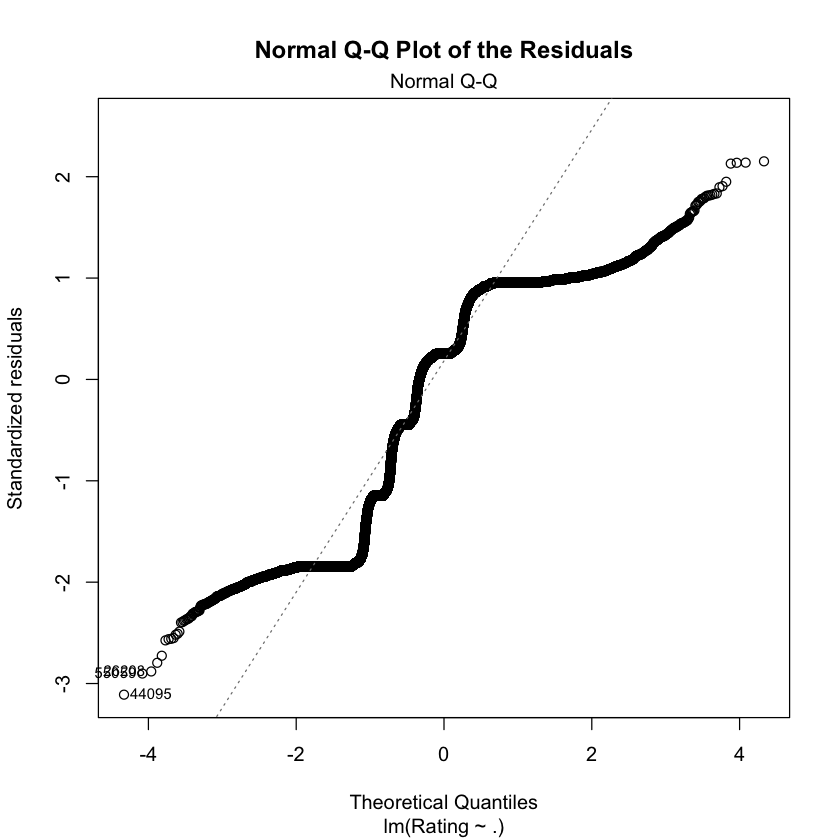

In [14]:
plot(Linear_Regression, which=c(2),main="Normal Q-Q Plot of the Residuals")
jpeg(file="figure/Linear_Regression_QQPLOT.jpeg")
plot(Linear_Regression, which=c(2),main="Normal Q-Q Plot of the Residuals")
dev.off()

As you can see, for assumption of linear regression, our model cannot meets the assumptions well, especially the normality assumptions. Therefore we have no idea whether linear regression is a good method. 

As you can see, the R squared is not too high. Because not all of our words can explain the variability in star rating. 

In [15]:
Linear_Regression_Results=summary(Linear_Regression)$coefficients
colnames(Linear_Regression_Results)=c("Linear_Coefficients","Linear_STD_Error","Linear_T_Value","Linear_P_Value")
Linear_Regression_Results

,Linear_Coefficients,Linear_STD_Error,Linear_T_Value,Linear_P_Value
(Intercept),3.638882878,0.006891253,528.0437284,0.000000e+00
cheese,-0.053073714,0.009091397,-5.8377950,5.313907e-09
salad,0.009067203,0.009946704,0.9115787,3.619938e-01
chicken,-0.020528738,0.011195853,-1.8336020,6.671753e-02
beer,0.053715677,0.010699854,5.0202253,5.174288e-07
pasta,-0.017775594,0.014744614,-1.2055652,2.279894e-01
pepperoni,0.046827069,0.016384333,2.8580393,4.263988e-03
wine,0.094791635,0.016197072,5.8523933,4.867960e-09
sausage,0.086170714,0.020232781,4.2589654,2.056547e-05
garlic,0.027559802,0.019942163,1.3819866,1.669804e-01


# Lasso Regression

Try use Lasso Regression to calculate the coefficients.

In [16]:
Linear_Food_Data=as.matrix(Linear_Food_Data)

In [17]:
cv.lasso <- cv.glmnet(Linear_Food_Data[,-1], Linear_Food_Data[,1], alpha = 1, family = "gaussian")

In [18]:
cv.lasso$lambda.1se
coef(cv.lasso, cv.lasso$lambda.1se)

[1] 0.01453092

126 x 1 sparse Matrix of class "dgCMatrix"
                        1
(Intercept)   3.648472452
cheese       -0.017138563
salad         .          
chicken       .          
beer          0.038242099
pasta         .          
pepperoni     .          
wine          0.067184372
sausage       0.034190643
garlic        .          
tomato        .          
mushroom      .          
steak         .          
onion         .          
bacon         0.068712891
mozzarella    0.107083584
potato        .          
shrimp       -0.041437251
fish         -0.033909934
marinara      .          
spaghetti    -0.026370163
lettuce      -0.527233163
bbq           0.045769725
lasagna       .          
gelato        0.093156406
cocktail      0.146216944
ravioli       .          
taco          .          
pesto         0.068947311
margherita    0.078826059
chocolate     0.086207327
coffee        .          
rib           .          
calamari      .          
crunchy       0.223484982
arugula       0.16505

In [19]:
Lasso_Results=data.frame(coef(cv.lasso, cv.lasso$lambda.1se)[-1])
Name=row.names(Linear_Regression_Results)
Lasso_Results=cbind(Name,rbind(c(coef(cv.lasso, cv.lasso$lambda.1se)[1]),Lasso_Results))
colnames(Lasso_Results)=c("Food","Lasso_Coefficients")


The Lasso regression give coefficients 0 to those on the boundary of significance.

In [20]:
Final_Results=Lasso_Results[which(Lasso_Results[,2]!=0),]
Final_Results

,Food,Lasso_Coefficients
,<chr>,<dbl>
1,(Intercept),3.648472452
2,cheese,-0.017138563
5,beer,0.038242099
8,wine,0.067184372
9,sausage,0.034190643
15,bacon,0.068712891
16,mozzarella,0.107083584
18,shrimp,-0.041437251
19,fish,-0.033909934


In [21]:
write.csv(Final_Results,"data/Results_Analysis_Noun_Class.csv")

Here we provide the results from lasso regression, from both we can test some the difference between the star rating of reviews contains such word or not. For example, "beer" and "wine" is positive with star rating, which means that offer beer and wine may increase review star rating. This results coincide with business analysis following. For all words, we will give suggestion in Shiny app. 